In [86]:
#1 Load the Dataset & Initial Exploration

In [88]:
# 1.1 Download the Dataset
#Go to this Kaggle dataset link
#https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
#Click Download, and save the file WA_Fn-UseC_-Telco-Customer-Churn.csv.
#Put it inside a folder called data/ in your project.

In [ ]:
# 1.2 Start a new Jupyter Notebook

In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [89]:
# 1.3 Understand the Dataset

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.shape

(7043, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [91]:
# 1.4 Check for Missing or Wrong Data

In [60]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
# 1.5 Clean Column: TotalCharges (important!)

In [61]:
# changing TotalCharges to a number because it is mentioned as an object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [62]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [63]:
df = df.dropna(subset = ['TotalCharges'])

In [64]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
# 1.6 Quick Target Variable Analysis

In [65]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [66]:
df['Churn'].value_counts(normalize = True)*100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [94]:
# 1.7 Visualizations (EDA)

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

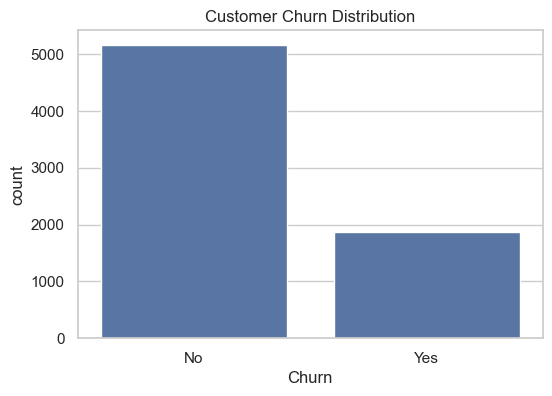

In [68]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Churn')
plt.title('Customer Churn Distribution')
plt.show()

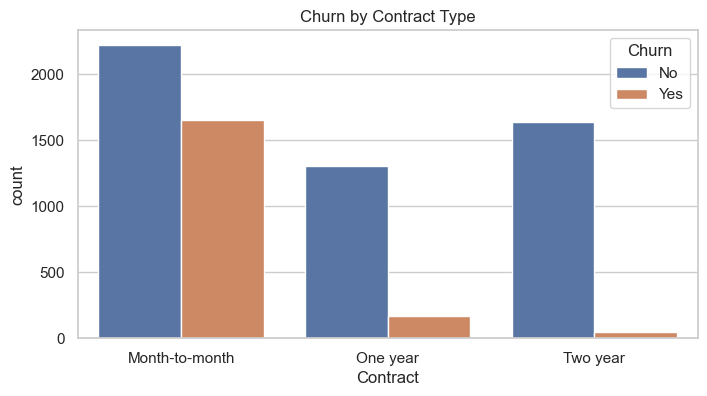

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

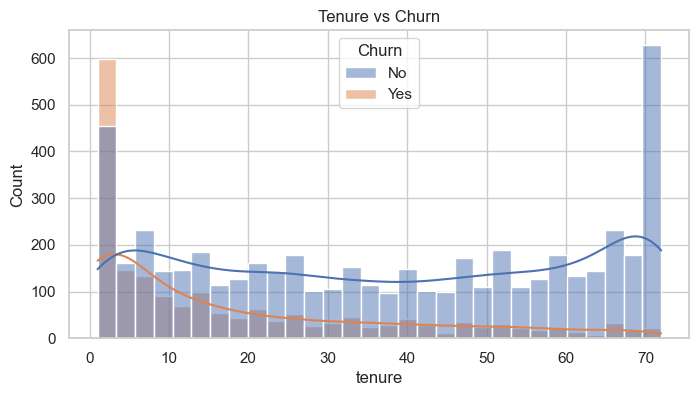

In [70]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue = 'Churn', kde = True, bins = 30)
plt.title('Tenure vs Churn')
plt.show()

In [71]:
#2 Data Preprocessing & Feature Engineering

In [95]:
# 2.1 Identify Categorical vs Numerical Columns

In [72]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [96]:
# 2.2 Drop Irrelevant Columns

In [73]:
df = df.drop('customerID', axis = 1)

In [97]:
# 2.3 Convert Target Column to Binary (0/1)

In [74]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [75]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [98]:
# 2.4 Encode Categorical Features

In [76]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [84]:
df_encoded = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [99]:
# 2.5 Scale Numeric Features

In [82]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [100]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,-0.260878,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,-0.363923,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,-0.747850,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.343137,0.664868,-0.129180,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,1.612573,1.276493,2.241056,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,-0.872808,-1.170004,-0.854514,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,-1.158016,0.319168,-0.872095,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [101]:
# 2.6 Split Dataset into X and y

In [102]:
X = df_encoded.drop('Churn', axis = 1)
y = df_encoded['Churn']

In [103]:
# 2.7 Train-Test Split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [106]:
#3 Model Training & Evaluation

In [108]:
# 3.1 Models We’ll Try
# Logistic Regression
# Random Forest
# XGBoost

In [109]:
# 3.2 Train Models

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [114]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric = 'logloss', random_state=42)

In [118]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [119]:
# 3.3 Evaluate Models

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [129]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

print("\n Logistic Regression Performance:")
evaluate_model(logreg, X_test, y_test)
print("\n Random Forest Performance:")
evaluate_model(rf, X_test, y_test)
print("\n XGBoost Performance:")
evaluate_model(xgb, X_test, y_test)



 Logistic Regression Performance:
Accuracy: 0.8045
Precision: 0.6495
Recall: 0.5749
F1 Score: 0.6099
ROC AUC: 0.8360

 Random Forest Performance:
Accuracy: 0.7896
Precision: 0.6258
Recall: 0.5187
F1 Score: 0.5673
ROC AUC: 0.8163

 XGBoost Performance:
Accuracy: 0.7783
Precision: 0.5891
Recall: 0.5481
F1 Score: 0.5679
ROC AUC: 0.8197


In [130]:
# 3.4 Confusion Matrix (Visual)

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

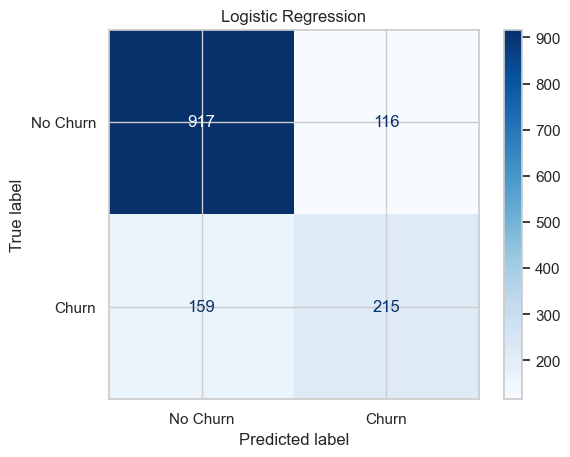

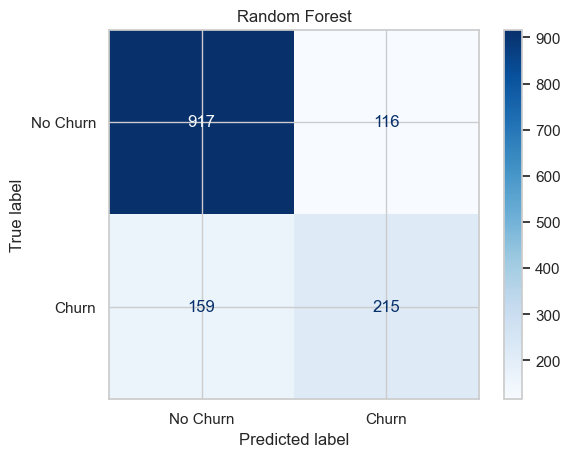

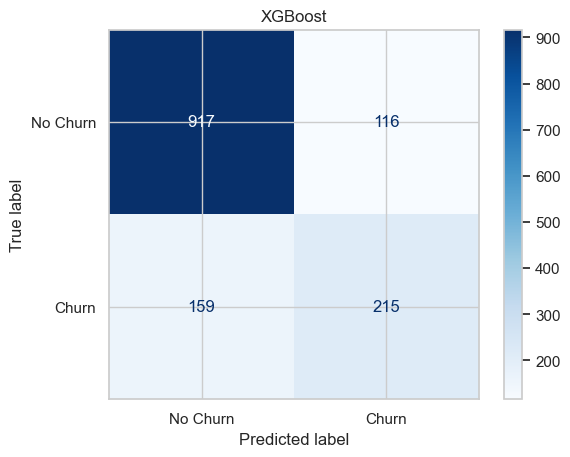

In [134]:
def plot_conf_matrix(model, X_test,y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn','Churn'])
    disp.plot(cmap = 'Blues')
    plt.title(title)
    plt.show()

plot_conf_matrix(logreg,X_test,y_test, "Logistic Regression")
plot_conf_matrix(logreg,X_test,y_test, "Random Forest")
plot_conf_matrix(logreg,X_test,y_test, "XGBoost")

In [135]:
#4 Model Explainability using SHAP

In [137]:
# 4.1 Install and Import SHAP

In [139]:
import shap
shap.initjs()

In [140]:
# 4.2 Create SHAP Explainer for XGBoost

In [141]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [142]:
# 4.3 Global Feature Importance Plot

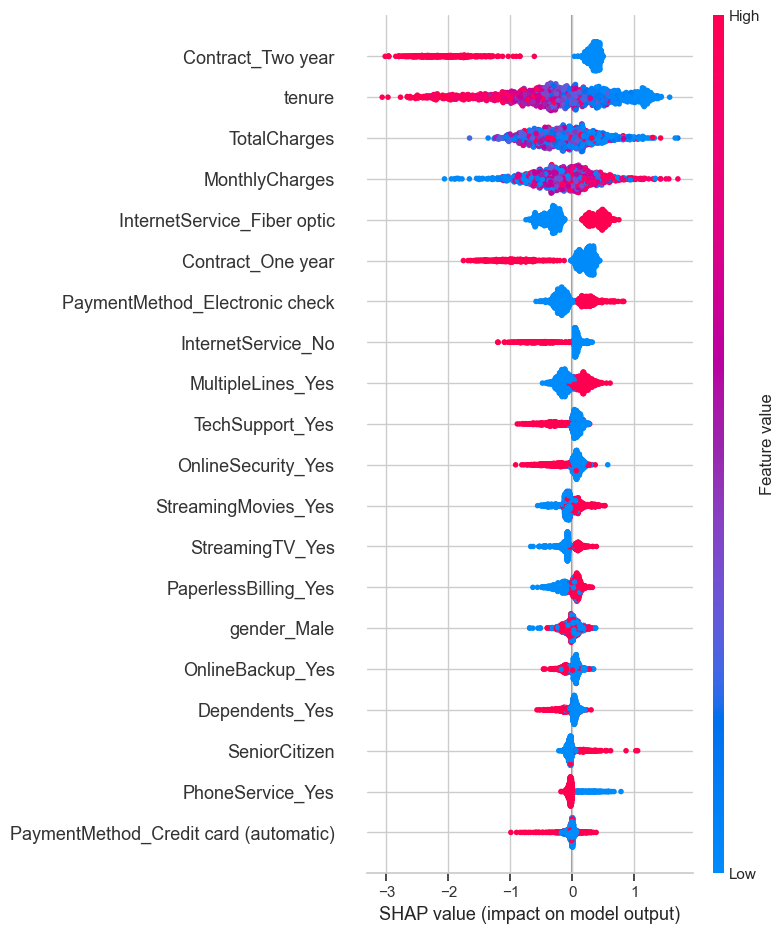

In [143]:
shap.summary_plot(shap_values, X_test)

In [144]:
#  4.4 Individual Prediction Explanation

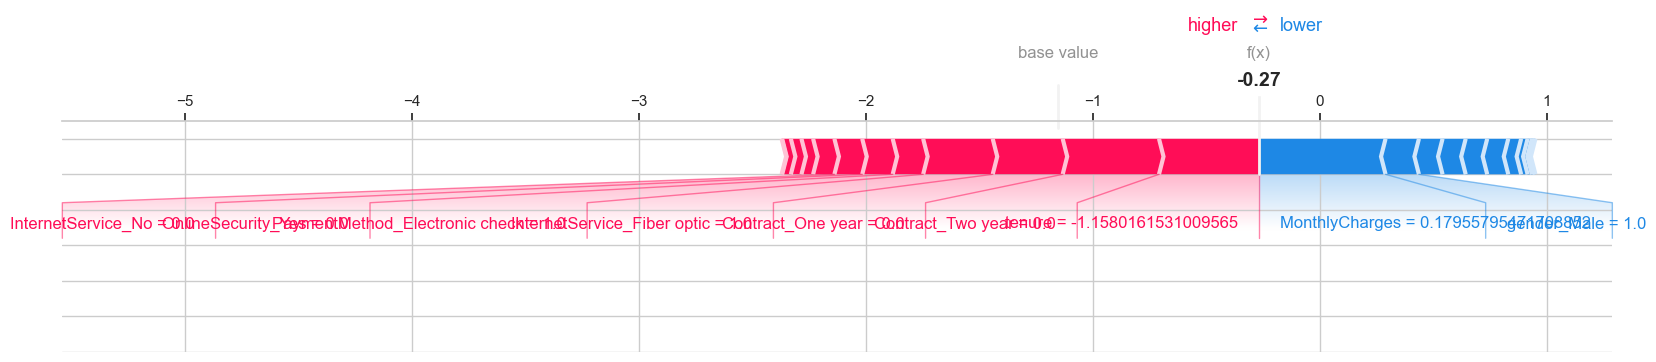

In [146]:
customer_index = 10
shap.force_plot(
    explainer.expected_value,
    shap_values[customer_index],
    X_test.iloc[customer_index],
    matplotlib=True
)

In [147]:
# 4.5 Save the Best Model for Deployment

In [149]:
import joblib
joblib.dump(xgb, 'churn_xgboost_model.pkl')

['churn_xgboost_model.pkl']